In [592]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install seaborn
!pip install matplotlib
!pip install scipy
!pip install imbalanced-learn

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.cluster import DBSCAN
from scipy import stats

### 1) Загрузка данных

In [44]:
train_data = pd.read_csv('dataset/train.csv')
test_data = pd.read_csv('dataset/test.csv')

### 2) Предварительный анализ данных

In [46]:
train_data.head(20)

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate
5,5,1,39,1,171,1,19,133.1,1,19,...,0,0,0,0,0.000000,0,13.9,-0.3,0.79,Dropout
6,6,1,44,1,9085,1,39,130.0,1,37,...,0,5,8,5,13.250000,0,12.4,0.5,1.79,Graduate
7,7,1,1,1,9773,1,1,130.0,1,19,...,0,6,6,6,13.666667,0,10.8,1.4,1.74,Graduate
8,8,1,39,1,9003,1,1,133.1,1,19,...,0,6,10,0,0.000000,0,16.2,0.3,-0.92,Dropout
9,9,1,1,6,9500,1,1,135.0,1,37,...,0,7,7,6,12.966667,0,7.6,2.6,0.32,Graduate


In [48]:
train_data['Target'].value_counts()

Target
Graduate    36282
Dropout     25296
Enrolled    14940
Name: count, dtype: int64

В целевой переменной есть 3 класса. Классы несбалансированы. Целевая переменная, очевидно, категориальная, номинальный порядок.

In [52]:
# Проверка на пропуски
train_data.isna().sum().sort_values(ascending=False)

id                                                0
Curricular units 2nd sem (credited)               0
International                                     0
Curricular units 1st sem (credited)               0
Curricular units 1st sem (enrolled)               0
Curricular units 1st sem (evaluations)            0
Curricular units 1st sem (approved)               0
Curricular units 1st sem (grade)                  0
Curricular units 1st sem (without evaluations)    0
Curricular units 2nd sem (enrolled)               0
Marital status                                    0
Curricular units 2nd sem (evaluations)            0
Curricular units 2nd sem (approved)               0
Curricular units 2nd sem (grade)                  0
Curricular units 2nd sem (without evaluations)    0
Unemployment rate                                 0
Inflation rate                                    0
GDP                                               0
Age at enrollment                                 0
Scholarship 

In [54]:
# Проверяем, есть ли дубликаты
train_data.duplicated().sum()

0

In [56]:
# Пытаемся определить, сколько категориальных и числовых признаков у нас есть.
# Подобрал поиском и анализом примерную величину уникальных значений столбцов, которая позволяет провести эту границу
cat_cols = [col for col in train_data.columns if train_data[col].nunique() <= 19]

num_cols = [col for col in train_data.columns if train_data[col].nunique() >= 20]

# Извлекаем и выводим уникальные значения для каждого категориального признака
for col in cat_cols:
    unique_values = train_data[col].unique()
    print(f"Уникальные значения в столбце категориальных признаков'{col}': {unique_values}")

# Извлекаем и выводим уникальные значения для каждого категориального признака
for col in num_cols:
    unique_values = train_data[col].unique()
    print(f"Уникальные значения в столбце числовых признаков'{col}': {unique_values}")

Уникальные значения в столбце категориальных признаков'Marital status': [1 2 4 3 5 6]
Уникальные значения в столбце категориальных признаков'Application order': [1 2 3 6 4 5 0 9]
Уникальные значения в столбце категориальных признаков'Course': [9238 9254 9500  171 9085 9773 9003 9853 9147 9670 8014 9119 9991 9130
 9556 9070   33  979   39]
Уникальные значения в столбце категориальных признаков'Daytime/evening attendance': [1 0]
Уникальные значения в столбце категориальных признаков'Nacionality': [  1  26  41  24   6 100  21  22  11 101   2 103 105  25  17  62 109  32]
Уникальные значения в столбце категориальных признаков'Displaced': [0 1]
Уникальные значения в столбце категориальных признаков'Educational special needs': [0 1]
Уникальные значения в столбце категориальных признаков'Debtor': [0 1]
Уникальные значения в столбце категориальных признаков'Tuition fees up to date': [1 0]
Уникальные значения в столбце категориальных признаков'Gender': [0 1]
Уникальные значения в столбце категор

In [57]:
# Категориальные признаки
categorical_columns = [
    "Marital status", "Application mode", "Application order", "Course",
    "Daytime/evening attendance", "Previous qualification", "Nacionality",
    "Mother's qualification", "Father's qualification", "Mother's occupation",
    "Father's occupation", "Displaced", "Educational special needs", "Debtor",
    "Tuition fees up to date", "Gender", "Scholarship holder", "International"
]

# Числовые признаки
numerical_columns = [
    "Previous qualification (grade)", "Admission grade", "Age at enrollment",
    "Curricular units 1st sem (credited)", "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)", "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)", "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (credited)", "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)", "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (grade)", "Curricular units 2nd sem (without evaluations)",
    "Unemployment rate", "Inflation rate", "GDP"
]

print("Категориальные признаки:")
for column in categorical_columns:
    print(column)

print("\n")

print("Числовые признаки:")
for column in numerical_columns:
    print(column)

Категориальные признаки:
Marital status
Application mode
Application order
Course
Daytime/evening attendance
Previous qualification
Nacionality
Mother's qualification
Father's qualification
Mother's occupation
Father's occupation
Displaced
Educational special needs
Debtor
Tuition fees up to date
Gender
Scholarship holder
International


Числовые признаки:
Previous qualification (grade)
Admission grade
Age at enrollment
Curricular units 1st sem (credited)
Curricular units 1st sem (enrolled)
Curricular units 1st sem (evaluations)
Curricular units 1st sem (approved)
Curricular units 1st sem (grade)
Curricular units 1st sem (without evaluations)
Curricular units 2nd sem (credited)
Curricular units 2nd sem (enrolled)
Curricular units 2nd sem (evaluations)
Curricular units 2nd sem (approved)
Curricular units 2nd sem (grade)
Curricular units 2nd sem (without evaluations)
Unemployment rate
Inflation rate
GDP


## 3) Статистический подход к поиску выбросов

In [61]:
# Используем метод межквартильного размаха (IQR) для выявления выбросов
# Выбросы определяются как значения, находящиеся за пределами диапазона Q1 - 1.5 * IQR и Q3 + 1.5 * IQR

def find_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]

# Применение к числовым признакам и вывод только тех, где есть выбросы
outliers = {}
for column in numerical_columns:  
    outlier_data = find_outliers_iqr(train_data, column)
    if not outlier_data.empty:  # Проверяем, есть ли выбросы
        outliers[column] = outlier_data

# Выводим только столбцы с выбросами
for column, outlier_data in outliers.items():
    print(f"Выбросы в столбце '{column}':")
    print(outlier_data[[column]]) 

Выбросы в столбце 'Previous qualification (grade)':
       Previous qualification (grade)
69                              100.0
77                              168.0
189                             100.0
292                             175.0
325                             100.0
...                               ...
76343                           100.0
76392                           100.0
76412                           100.0
76418                           165.0
76459                           170.0

[1364 rows x 1 columns]
Выбросы в столбце 'Admission grade':
       Admission grade
29               170.0
33               154.0
68               160.0
76               160.0
77               166.0
...                ...
76456            157.7
76459            166.6
76468             95.5
76480             95.0
76510            153.6

[2577 rows x 1 columns]
Выбросы в столбце 'Age at enrollment':
       Age at enrollment
16                    34
29                    53
38             

In [62]:
print(f'Выбросы по IQR в строках {len(outlier_data)} из {len(train_data[numerical_columns])}')

Выбросы по IQR в строках 2146 из 76518


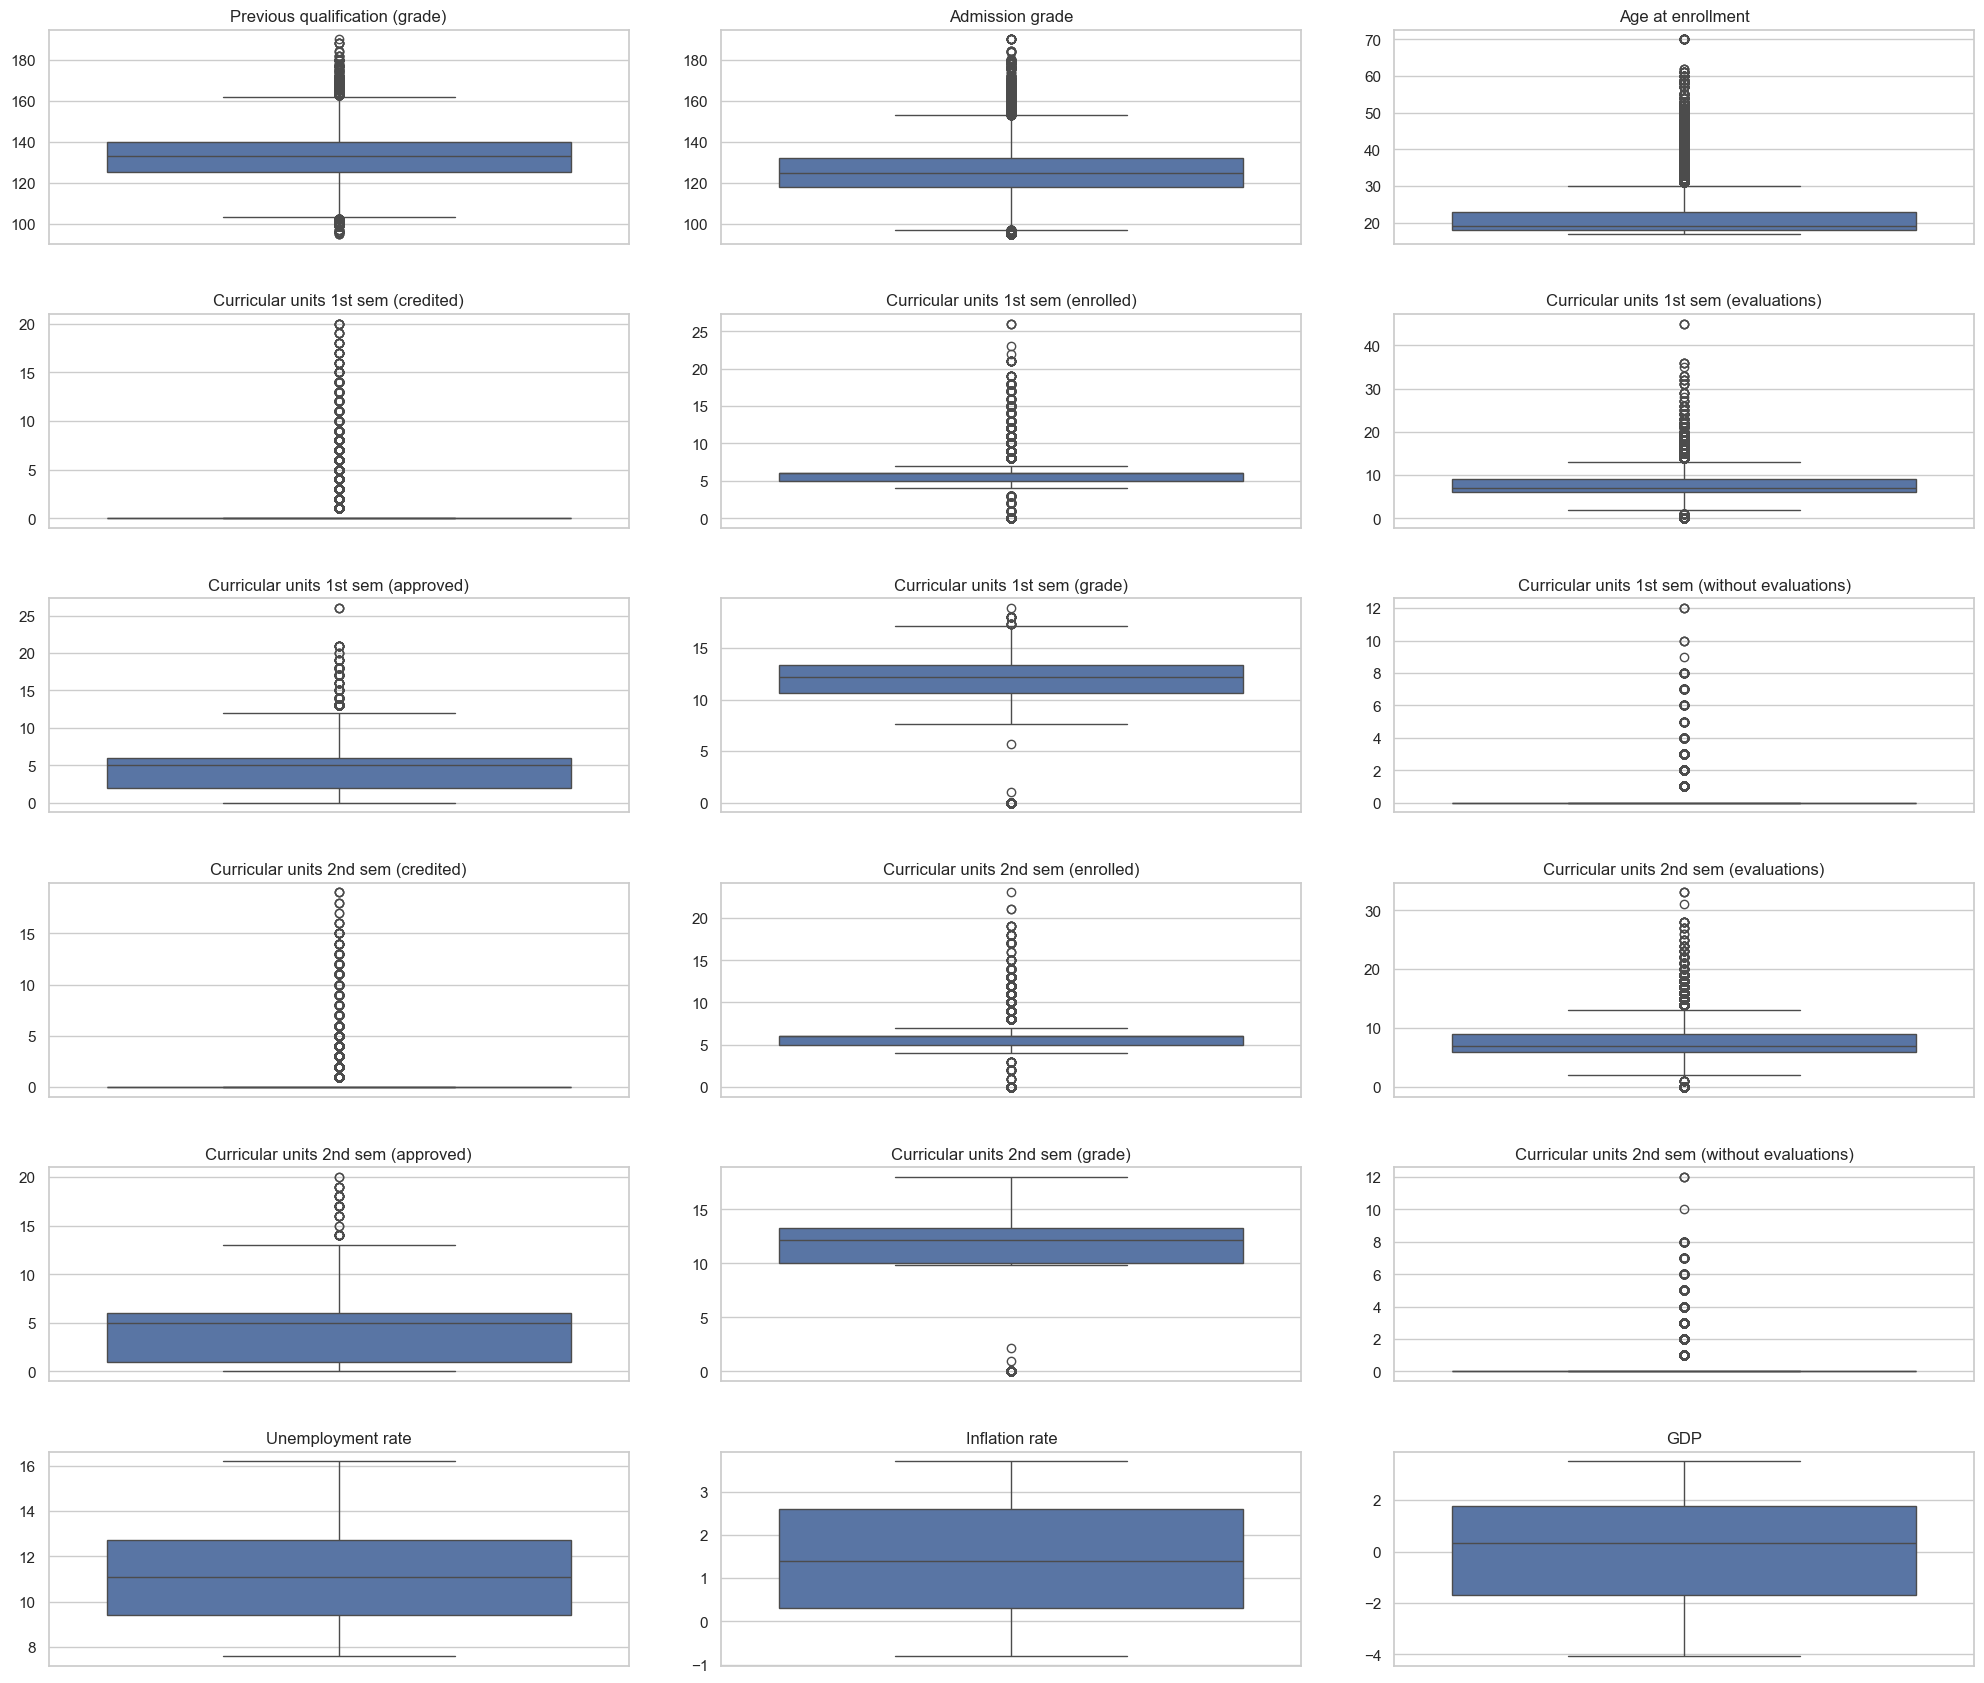

In [65]:
# Настройка стиля графиков
sns.set(style="whitegrid")

num_features = len(numerical_columns)
cols = 3
rows = (num_features + cols - 1) // cols

# Создание ящиков с усами для каждого признака
plt.figure(figsize=(20, 17))
for i, column in enumerate(numerical_columns):
    plt.subplot(rows, cols, i + 1)  # Настройте количество строк и столбцов в зависимости от количества признаков
    sns.boxplot(y=train_data[column])
    plt.title(column)
    plt.ylabel('')

plt.tight_layout(pad=1.08, h_pad=3, w_pad=3)
plt.show()

## 4) Применение DBSCAN для поиска выбросов

In [67]:
# Нормализация данных
scaler = StandardScaler()
data_scaled = scaler.fit_transform(train_data[numerical_columns])

# Применение DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(data_scaled)

# Добавление результатов кластеризации в DataFrame
train_data['Cluster'] = clusters

# Выделение выбросов (шум обозначается как -1)
outliers_dbscan = train_data[train_data['Cluster'] == -1]

train_data['Cluster']

0         0
1        -1
2        13
3        -1
4        -1
         ..
76513    18
76514    -1
76515    -1
76516    41
76517     9
Name: Cluster, Length: 76518, dtype: int64

In [68]:
print(f'Выбросы по DBSCAN в строках {len(outliers_dbscan)} из {len(train_data[numerical_columns])}')

Выбросы по DBSCAN в строках 39116 из 76518


## 5) Удаление выбросов и обучение модели

### До удаления выбросов

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Подготовка данных
X = train_data.drop('Target', axis=1)
y = train_data['Target']

# Решить проблему дисбаланса классов
smt = SMOTE()
X_resampled, y_resampled = smt.fit_resample(X, y)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Создаем модель логистической регрессии
log_reg = LogisticRegression(solver='liblinear', max_iter=4000, random_state=42)

# Обучаем модель с использованием One-vs-Rest классификации
ovr_classifier = OneVsRestClassifier(log_reg)
ovr_classifier.fit(X_train, y_train)

# Получаем предсказания на тестовой выборке
y_pred = ovr_classifier.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.79
              precision    recall  f1-score   support

     Dropout       0.89      0.75      0.81      7223
    Enrolled       0.71      0.74      0.72      7201
    Graduate       0.78      0.87      0.82      7346

    accuracy                           0.79     21770
   macro avg       0.79      0.79      0.79     21770
weighted avg       0.79      0.79      0.79     21770



### После удаления выбросов

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Подготовка данных
without_outliers = train_data[train_data['Cluster'] > -1]
without_outliers = without_outliers.drop('Cluster', axis=1)
X = without_outliers.drop('Target', axis=1)
y = without_outliers['Target']

# Решить проблему дисбаланса классов
smt = SMOTE()
X_resampled, y_resampled = smt.fit_resample(X, y)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Создаем модель логистической регрессии
log_reg = LogisticRegression(solver='liblinear', max_iter=4000, random_state=42)

# Обучаем модель с использованием One-vs-Rest классификации
ovr_classifier = OneVsRestClassifier(log_reg)
ovr_classifier.fit(X_train, y_train)

# Получаем предсказания на тестовой выборке
y_pred = ovr_classifier.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.84
              precision    recall  f1-score   support

     Dropout       0.91      0.90      0.90      4895
    Enrolled       0.80      0.75      0.77      4900
    Graduate       0.80      0.86      0.83      4841

    accuracy                           0.84     14636
   macro avg       0.84      0.84      0.84     14636
weighted avg       0.84      0.84      0.84     14636

